<a href="https://colab.research.google.com/github/Team-No-3/Steering_wheel/blob/main/YOLO_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLO(You Only Look Once)

이미지 내에 존재하는 객체와 해당 객체의 위치는 이미지를 한 번만 보고 예측할 수 있다는 의미 

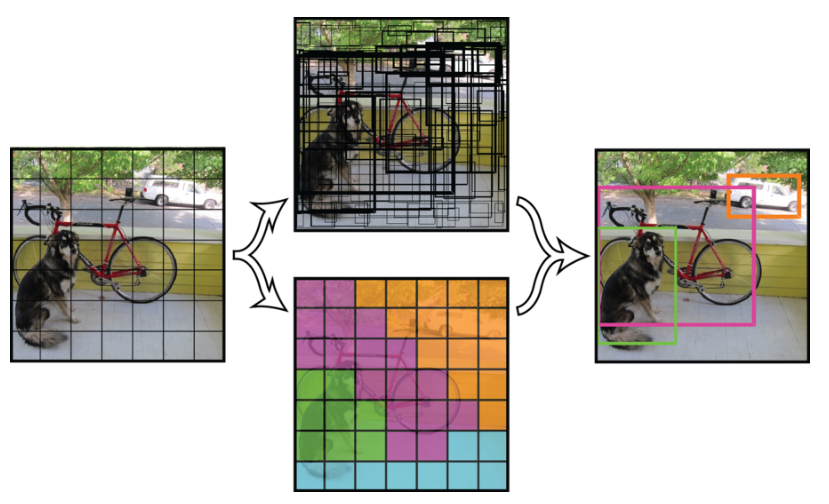

원본 이미지를 동일한 크기의 그리드(grid)로 나눈 후 각 그리드에 대해 그리드 중앙을 중심으로 미리 정의된 형태(predefined shape)으로 지정된 경계박스의 개수를 예측하고 이를 기반으로 신뢰도를 계산하여 이미지에 객체가 포함되어 있는지, 또는 배경만 단독으로 있는지에 대한 여부가         
포함되며 높은 객체 신뢰도를 가진 위치를 선택해 객체 카테고리를 파악

이미지 입력 → 이미지를 Grid로 나눔 → Grid 당 2개의 Box proposal → confidence score로 1차 선별(object 없는것) →   
NMS에 의해 최종 선별(object하나에 box 겹침) → class 지정과 그에 따른 색칠

<h2>구조(backbone-(neck)-head)<h2>

<h2>backbone 

: 
입력을 feature map으로 변형,  학습구간,  CSPNet (cross stage partial densenet)

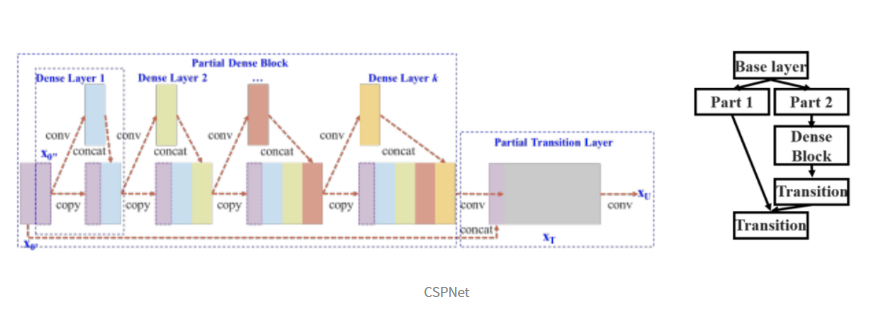

<h2>DenseNet 과 ResNet


resnet의 핵심 : residual block(h(x)) + bottleneck(1x1)
공통점 : skip connection, 1x1사용 , 차이점 : add가 아닌 concatenation(등차수열, growth rate), expansion 없음

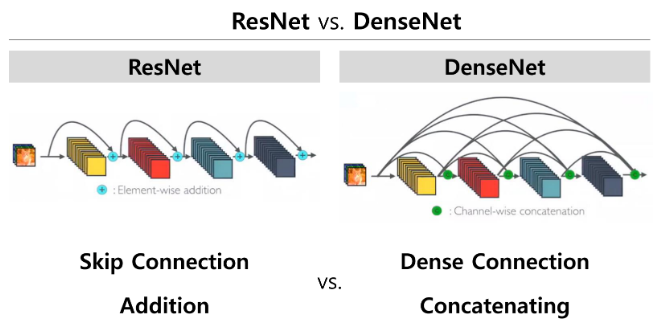

<h2>CSP기법

 :
 DenseNet은 반복 학습이다. base layer의 일부만 dense진행하여 재사용을 방지한다.

<h2>neck

 :
 feature map 재구성. SPP(spatial pyramid pooling) : receptive field를 늘리는 방법으로 feature map을 정해준 grid에 맞추어 max pooling

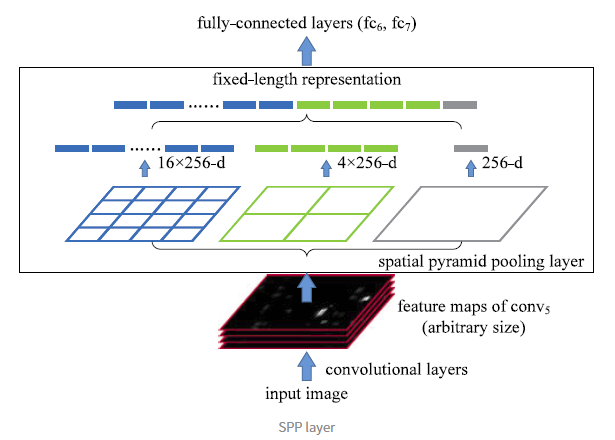

55, 99, 13*13 으로 진행되며 input이 자유롭고 output이 고정길이벡터이다.
  
  +SAM(self-attention module) : max pooling, average pooling -> conv -> sigmoid -> 결과+input = refine

<h2>PAN(path augmented network)

 :
 그 중 bottom-up path augmentation으로 low level feature -> high로 전달한다. low 정보보존 목적과 localization, low는 small object 검출 유용, high는 large

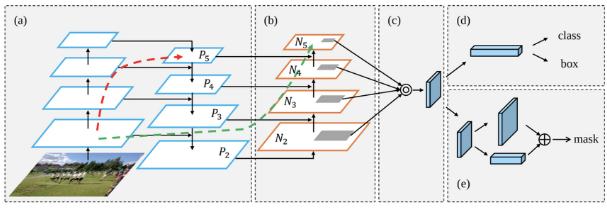

+본래 FPN(feature pyramid network) : RPN과 Fast R-CNN을 기반

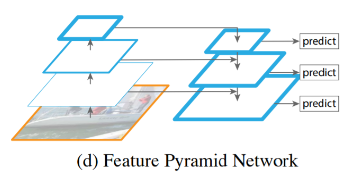

<h2>head 

:  feature map의 location (bounding boxes, predict classes 작업) YOLO v3와 동일하게 3가지로 분류

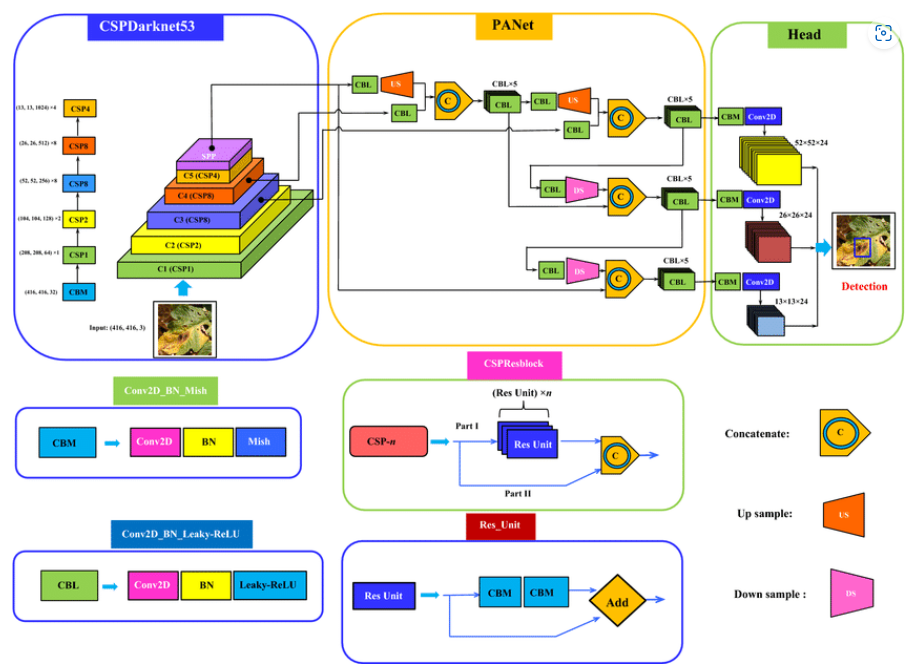

<h2>평가 방법

IOU 

:
intersection over union, 두 박스의 겹친 정도, 2/3겹치는 약 0.5를 threshold로 보편적 사용, NMS(non-maximum suppression 겹치는 박스 중 1가지만 남김, P * IOU), R-CNN(region class label)에 이용된다.

mAP(mean average precision) 

: 
Recall과 Pricison을 모두 고려하기위함. RC curve는 IOU의 threshold를 높이면 R이 증가함에 따라 P가 감소하는 양상. 이 그래프의 면적으로  
단일 라벨에 대한 수치가 AP. 이를 다수의 라벨로 나누어 평균을 내면 mAP이다. mAP50-95은 IOU 50-95,0.05step에 해당하는 mAP로 범용화된  
수치이다.

<h2>결과 해석

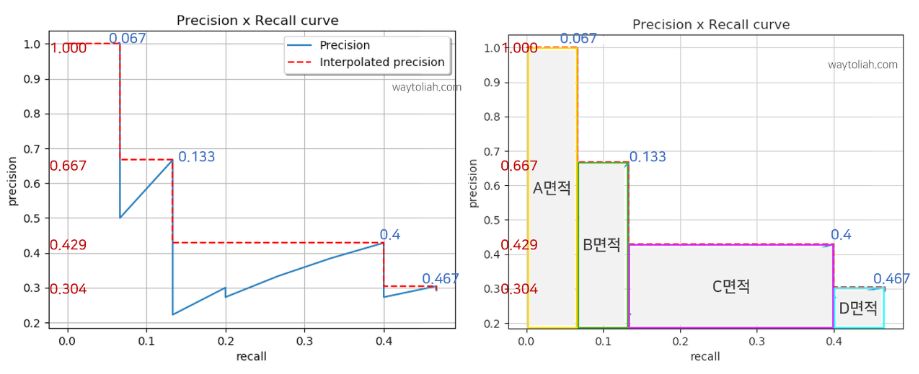

result dataset 해석 (graph)

train/box_loss : 학습의 박스좌표 loss 

obj_loss : 사물인지 loss 

cls_loss : class loss 

metrics/precision

: 학습에 대한 검증의 그래프 (어떤 것을 어떻게 예측)
x,y 좌표, 높이-길이 양상, 이를 막대그래프화
데이터셋 라벨그래프, 막스 양상, x:y, width:height
f1-confidence curve : confidence(P/IOU) f1(P,R의 조화평균)